# Data Analysis for Disney Movies

## Author : Roopam Arora

## Introduction:
This report analyzes a few datasets related to Disney movies and answers a question related to the movies by using some Python concepts, data structures and modules like Pandas, NumPy and altair for visualization.

## Question(s) of interests
The question considered in this report is "Which adventure movie director had a blockbuster movie with gross earning more than $400M in the 21st Century(the year 2000's)?"
I am interested in knowing the answer to this question to understand who is the skilled Disney director to work with and vote for the Academy awards and also vote for the best song. I am considering the total gross earnings for the movies as against the inflation adjusted gross.

## Dataset description
The below descripitions were taken directly from the website where the datasets were obtained.

"Disney characters, box office success & annual gross income"

The Disney movie dataset is composed of 5 tables - disney_movies_total_gross.csv, disney_revenue_1991-2016.csv, disney-characters.csv, disney-director.csv and disney-voice-actors.csv . Each table is stored in a .csv file and contains different information about Disney movies pieces including gross income, characters, songs, revenue, directors and voice actors. I will be using the disney_movies_total_gross, disney-characters and disney-director tables formally described below:

disney_movies_total_gross.csv
This file contains information on movie title, including a release date, genre, MPAA rating, total gross income and inflation adjusted gross income.
disney-characters.csv
This file includes information on movie title, including a release date, hero, villain and song for every movie.
disney-director.csv
This file includes information on movie title and the director for each movie. 

## Methods & Results:

In this analysis, I plan to import the relevant modules like pandas, altair and numpy. Then read the 3 datasets - disney_movies_total_gross.csv, disney-director.csv and disney-characters.csv. Then I would do some wrangling and cleaning of the datasets to convert them into a format where I can merge them and extract the answer to my question. I am going to use a function for wrangling and formatting and also some test functions to test my function. I am goignt o format my function using flake8 and black formatting. Finally, I will derive the answer to my question. Let's begin.

### Let us import the modules, read our tables and do some basic visualizations:

In [1]:
#import the modules to be used
import pandas as pd
import altair as alt
import numpy as np

In [2]:
#Reading the first dataset - disney_movies_total_gross:
disney_total_gross_df = pd.read_csv('data/disney_movies_total_gross.csv')
disney_total_gross_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [3]:
#Reading the second dataset - disney_director:
disney_director_df = pd.read_csv('data/disney-director.csv')
#renaming the column to make merging easier
disney_director_df_new = disney_director_df.rename(columns={"name": "movie_title"})
disney_director_df_new

,movie_title,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand
5,Saludos Amigos,Jack Kinney
6,The Three Caballeros,Norman Ferguson
7,Make Mine Music,Jack Kinney
8,Fun and Fancy Free,Jack Kinney
9,Melody Time,Clyde Geronimi


In [4]:
#Reading the third datset - disney_characters:

disney_characters_df = pd.read_csv('data/disney-characters.csv')


## Summarizing the datasets

In [5]:
disney_total_gross_df.describe()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
count,579,579,562,523,579,579
unique,573,553,12,5,576,576
top,The Jungle Book,"Dec 25, 1997",Comedy,PG,$0,$0
freq,3,3,182,187,4,4


In [6]:
disney_director_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  56 non-null     object
 1   director     56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [7]:
disney_characters_df.shape

(56, 5)

## Data Wrangling and clean up

In [8]:
#Wrangling the disney_movies_total_gross dataset using the wrangle_disney_data function

from wrangle_data import wrangle_disney_data

ch = "[$,]"
col1 = 'total_gross'
disney_gross_wrangled_df = wrangle_disney_data(disney_total_gross_df,col1,ch, col2 ='release_date')
disney_gross_wrangled_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,"$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,84300000,"$2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,83320000,"$2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,65000000,"$1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,85000000,"$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,"$12,545,979"
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,"$8,874,389"
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,"$232,532,923"
577,Moana,2016-11-23,Adventure,PG,246082029,"$246,082,029"


In [9]:
#Wrangling the disney-characters dataset using the wrangle_disney_data function

from wrangle_data import wrangle_disney_data

ch = "[\n,]"
column1 = 'movie_title'
disney_characters_wrangled_df = wrangle_disney_data(disney_characters_df,column1,ch, col2 ='release_date')
disney_characters_wrangled_df

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,1937-12-21,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940-02-07,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,1940-11-13,NaN,Chernabog,NaN
3,Dumbo,1941-10-23,Dumbo,Ringmaster,Baby Mine
4,Bambi,1942-08-13,Bambi,Hunter,Love Is a Song
5,Saludos Amigos,1943-02-06,Donald Duck,NaN,Saludos Amigos\n
6,The Three Caballeros,1945-02-03,Donald Duck,NaN,NaN
7,Make Mine Music,1946-04-20,NaN,NaN,NaN
8,Fun and Fancy Free,1947-09-27,Mickey Mouse,Willie the Giant,NaN
9,Melody Time,1948-05-27,NaN,NaN,Little Toot


## Filtering the first dataset for our analysis

In [10]:
#Finding the movies from first dataset(data/disney_movies_total_gross.csv) where gross earnings is more than $400M

disney_movies_400M_df = disney_total_gross_df.loc[disney_gross_wrangled_df['total_gross'].astype(int) > 400000000]
disney_movies_400M_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
179,The Lion King,1994-06-15,Adventure,G,422780140,"$761,640,898"
441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,"$544,817,142"
499,Toy Story 3,2010-06-18,Adventure,G,415004880,"$443,408,255"
524,The Avengers,2012-05-04,Action,PG-13,623279547,"$660,081,224"
532,Iron Man 3,2013-05-03,Action,PG-13,408992272,"$424,084,233"
539,Frozen,2013-11-22,Adventure,PG,400738009,"$414,997,174"
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,"$459,005,868"
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,"$936,662,225"
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,"$408,084,349"
571,Finding Dory,2016-06-17,Adventure,PG,486295561,"$486,295,561"


## Visualization with Altair

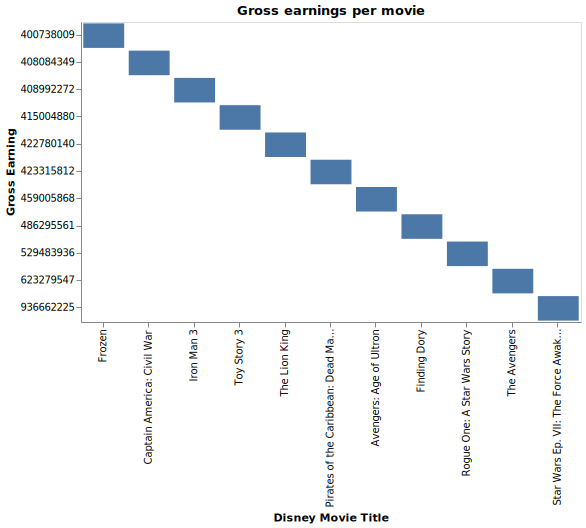

In [11]:
#Visualizing the first dataset:
alt.renderers.enable('altair_saver', fmts=["html", "svg"])

disney_total_gross_plot = alt.Chart(disney_movies_400M_df, width=500, height=300).mark_bar().encode (x=alt.X('movie_title', sort="y", title='Disney Movie Title'), 
                                                                           y=alt.Y('total_gross', title= 'Gross Earning')).properties(title="Gross earnings per movie")

disney_total_gross_plot

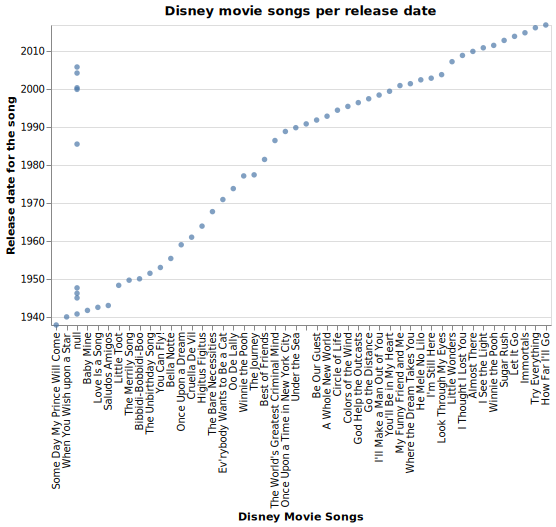

In [12]:
#Visualizing the first dataset:
disney_characters_plot = alt.Chart(disney_characters_wrangled_df, width=500, height=300).mark_circle().encode (x=alt.X('song', sort="y", title='Disney Movie Songs'), 
                                                                           y=alt.Y('release_date', title= 'Release date for the song')).properties(title="Disney movie songs per release date")

disney_characters_plot

## Code Improvement - black formatting

In [13]:
!flake8 wrangle_data.py

#Using black formatting to improve our function code
!black wrangle_data.py

wrangle_data.py:4:80: E501 line too long (81 > 79 characters)
wrangle_data.py:25:80: E501 line too long (86 > 79 characters)
All done! ✨ 🍰 ✨
1 file left unchanged.


## Testing the wrangle_data function

In [14]:
!pytest test_wrangle_data.py

============================= test session starts ==============================
platform linux -- Python 3.8.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: /home/jupyter/prog-python-ds-students/release/final_project
plugins: anyio-3.2.1, dash-1.20.0
collected 2 items                                                              

test_wrangle_data.py ..                                                  [100%]

============================== 2 passed in 0.81s ===============================


In [15]:
#Summarizing the data - combining the 3 datasets into one consolidated dataframe to make our analysis easier

merged_gross_character_df = pd.merge(disney_movies_400M_df, disney_director_df_new, how="left", on=["movie_title"])
merged_gross_character_df = pd.merge(merged_gross_character_df,disney_characters_df, how="left", on=["movie_title"] )
merged_gross_character_df = merged_gross_character_df.rename(columns={'release_date_x':'release_date','release_date_y':'release_date_song'})
merged_gross_character_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,release_date_song,hero,villian,song
0,The Lion King,1994-06-15,Adventure,G,422780140,"$761,640,898",Roger Allers,1994-06-24,Simba,Scar,Circle of Life
1,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,"$544,817,142",NaN,NaT,NaN,NaN,NaN
2,Toy Story 3,2010-06-18,Adventure,G,415004880,"$443,408,255",NaN,NaT,NaN,NaN,NaN
3,The Avengers,2012-05-04,Action,PG-13,623279547,"$660,081,224",NaN,NaT,NaN,NaN,NaN
4,Iron Man 3,2013-05-03,Action,PG-13,408992272,"$424,084,233",NaN,NaT,NaN,NaN,NaN
5,Frozen,2013-11-22,Adventure,PG,400738009,"$414,997,174",Chris Buck,2013-11-27,Elsa,Prince Hans,Let It Go\n
6,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,"$459,005,868",NaN,NaT,NaN,NaN,NaN
7,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,"$936,662,225",NaN,NaT,NaN,NaN,NaN
8,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,"$408,084,349",NaN,NaT,NaN,NaN,NaN
9,Finding Dory,2016-06-17,Adventure,PG,486295561,"$486,295,561",NaN,NaT,NaN,NaN,NaN


In [16]:
#Dropping the rows with Nan values

df_dropped = merged_gross_character_df.dropna()
df_dropped

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,director,release_date_song,hero,villian,song
0,The Lion King,1994-06-15,Adventure,G,422780140,"$761,640,898",Roger Allers,1994-06-24,Simba,Scar,Circle of Life
5,Frozen,2013-11-22,Adventure,PG,400738009,"$414,997,174",Chris Buck,2013-11-27,Elsa,Prince Hans,Let It Go\n


In [17]:
# Filtering the movie which was made in the 2000's
df_dropped_final = df_dropped.loc[df_dropped['release_date'].dt.year > 2000 ]
print("Highest Earning Adventure Movie Director")
df_dropped_final["director"]

Highest Earning Adventure Movie Director


5    Chris Buck
Name: director, dtype: object

In [18]:
print("Award Winning Song")
df_dropped_final["song"].replace("[\n,]","", regex=True)

Award Winning Song


5    Let It Go
Name: song, dtype: object

## Discussions

In this analysis, I found the director who directed the highest earning movie of the 2000's and most importantly the Academy Award winning song from the movie(Frozen). The song is "Let it go" which is definitely a very popular song. This answers my original question which was a part of this analysis. The other questions that I want to answer are the genre and the MPAA rating of this movie.

# References
Not all the work in this notebook is original. Some parts were borrowed from online resources. I take no credit for parts that are not mine. They were soley used for illustration purposes

* [Data Source](https://data.world/kgarrett/disney-character-success-00-16)
  All the tables(datset) were derived from this website
* [Question Of Interest](https://disney.fandom.com/wiki/Academy_Awards_won_by_Walt_Disney_Pictures)
  I got my interest in the question after going through this website